In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from datetime import date, timedelta as td, datetime as dt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df[:5]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


In [35]:
lower = [x.lower() for x in df.columns]
df.columns = lower
df.columns = df.columns.str.replace(' ', '_')
df.columns #convert columns to lower caps and fill empty spaces with _

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [36]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [37]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [38]:
df.groupby('response').count()['customer'] #count of responses

response
No     7826
Yes    1308
Name: customer, dtype: int64

In [39]:
df['response'].value_counts(normalize = True) #percentage of responses

No    0.86
Yes   0.14
Name: response, dtype: float64

Text(0.5, 1.0, 'Count of Respondents')

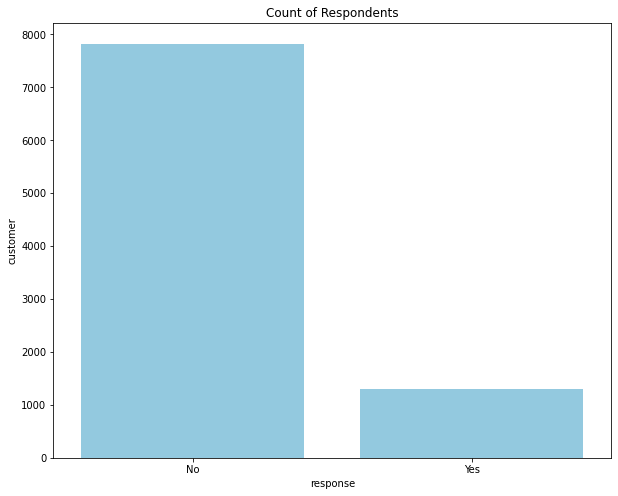

In [41]:
d1= df.groupby('response').count()['customer'].reset_index()
d1
plt.figure(figsize=(10,8))
sbn.barplot(x = d1['response'], y = d1['customer'], color = 'skyblue')
plt.title('Count of Respondents')

Focus on positive responses

In [46]:
df_nu=df[df['response'] == 'Yes']

In [42]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [43]:
df_nu['renew_offer_type'].unique()

array(['Offer2', 'Offer1', 'Offer3'], dtype=object)

In [44]:
df_nu['gender'].unique()

array(['F', 'M'], dtype=object)

In [47]:
df_nu['sales_channel'].unique()

array(['Web', 'Agent', 'Branch', 'Call Center'], dtype=object)

In [48]:
df_nu

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
5,OC83172,Oregon,8256.30,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.38,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.90,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.60,Four-Door Car,Medsize
8,DY87989,Oregon,24127.50,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.20,Four-Door Car,Medsize
13,SJ95423,Arizona,8819.02,Yes,Basic,High School or Below,1/10/11,Employed,M,99845,...,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.00,SUV,Medsize
22,YH23384,Arizona,24127.50,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Personal Auto,Personal L3,Offer1,Agent,511.20,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,RA89822,California,34611.38,Yes,Basic,High School or Below,1/14/11,Employed,F,20090,...,59,0,2,Personal Auto,Personal L2,Offer2,Agent,523.20,Sports Car,Medsize
9119,YX35990,California,5479.56,Yes,Basic,Master,1/13/11,Employed,M,56005,...,30,1,3,Corporate Auto,Corporate L2,Offer1,Branch,326.40,Four-Door Car,Small
9122,FH43628,California,25464.82,Yes,Extended,College,2/1/11,Retired,F,13663,...,66,0,2,Personal Auto,Personal L2,Offer1,Branch,465.60,Four-Door Car,Small
9123,WZ45103,California,5678.05,Yes,Extended,Bachelor,1/19/11,Unemployed,F,0,...,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.80,Four-Door Car,Small


Text(0.5, 1.0, 'Percentage by Offers')

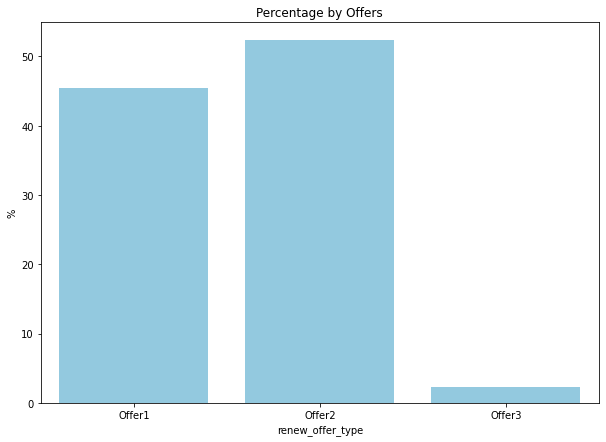

In [98]:
ofr_grp = df_nu.groupby(['renew_offer_type'])
ofr_grp1 = pd.DataFrame((ofr_grp.size() / df_nu.shape[0])*100).reset_index().rename(columns =({0:'%'}))
plt.figure(figsize =(10,7))
sbn.barplot(x = ofr_grp1['renew_offer_type'], y = ofr_grp1['%'], color = 'skyblue')
plt.title('Percentage by Offers')

In [ ]:
Offer 2 seems to be the most demanded offer.

In [106]:
df_nu.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [127]:
sc = df_nu.groupby('sales_channel').agg({'customer_lifetime_value': ['count', 'sum', 'mean']}).reset_index()
sc.columns = ['channel', 'total_reg', 'total_cltv','avg_cltv']
sc

,channel,total_reg,total_cltv,avg_cltv
0,Agent,666,5086886.62,7637.97
1,Branch,294,2424844.77,8247.77
2,Call Center,192,1537968.59,8010.25
3,Web,156,1224471.76,7849.18


Text(0.5, 1.0, 'Total registration by channel')

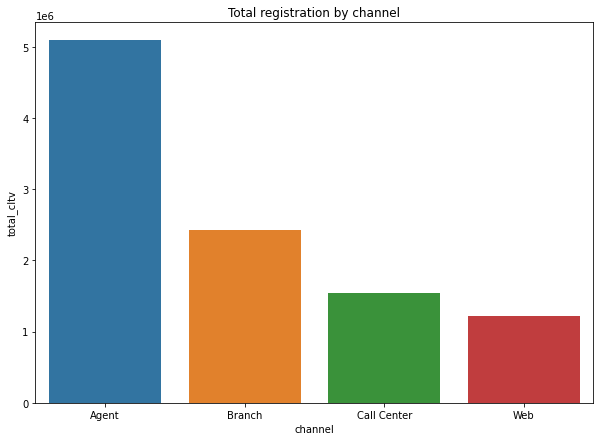

In [129]:
plt.figure(figsize=(10,7))
sbn.barplot(x = sc['channel'], y = sc['total_cltv'])
plt.title('Total registration by channel')

<AxesSubplot:xlabel='sales_channel', ylabel='customer_lifetime_value'>

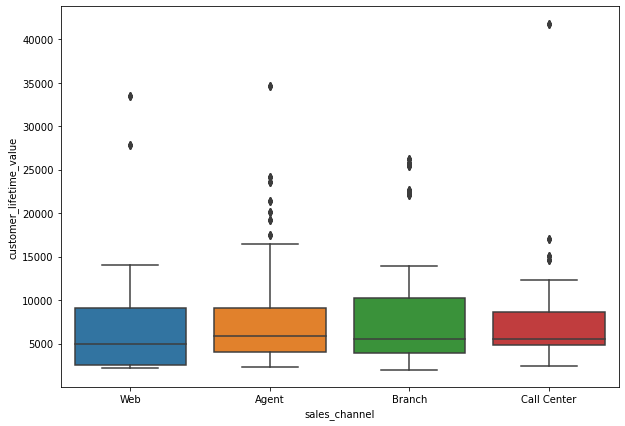

In [136]:
plt.figure(figsize=(10,7))
sbn.boxplot(x =df_nu['sales_channel'], y = df_nu['customer_lifetime_value'])